In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data

data_w = pd.read_csv('parkinsons_updrs.data')
xcol = data_w.columns.to_list()
xcol.remove('subject#')
xcol.remove('total_UPDRS')
xcol.remove('motor_UPDRS')
X = data_w[xcol]
y = data_w['total_UPDRS']

Columns values are:
'subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'.

Now, i prepare the train and test data



In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



 I analyse the correlation between variables (including the target):

<AxesSubplot:>

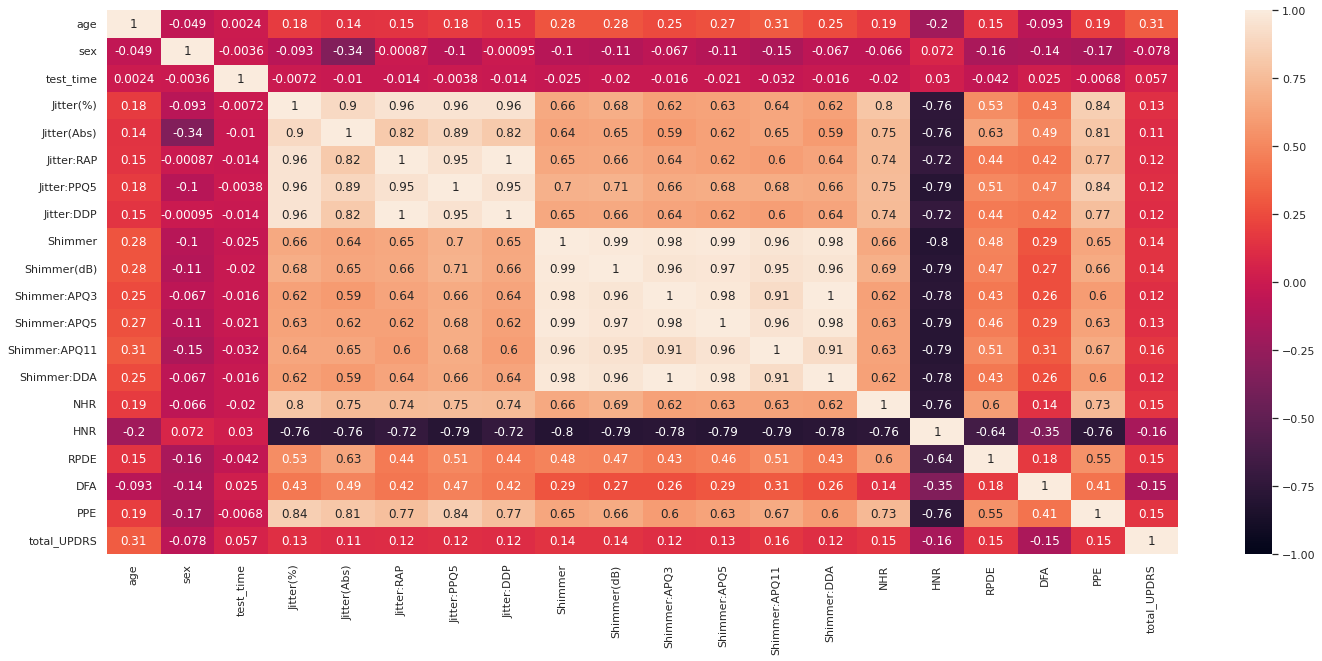

In [170]:
sns.set(rc={"figure.figsize":(24, 10)}) #width=6, height=5
a = pd.concat([X_train, y_train], axis=1)
corr = a.corr('spearman')
sns.heatmap(corr, yticklabels=True, vmin = -1, vmax=1, annot=True)


 I want to see the data distribution for all variables in order to analyse ouliers. 

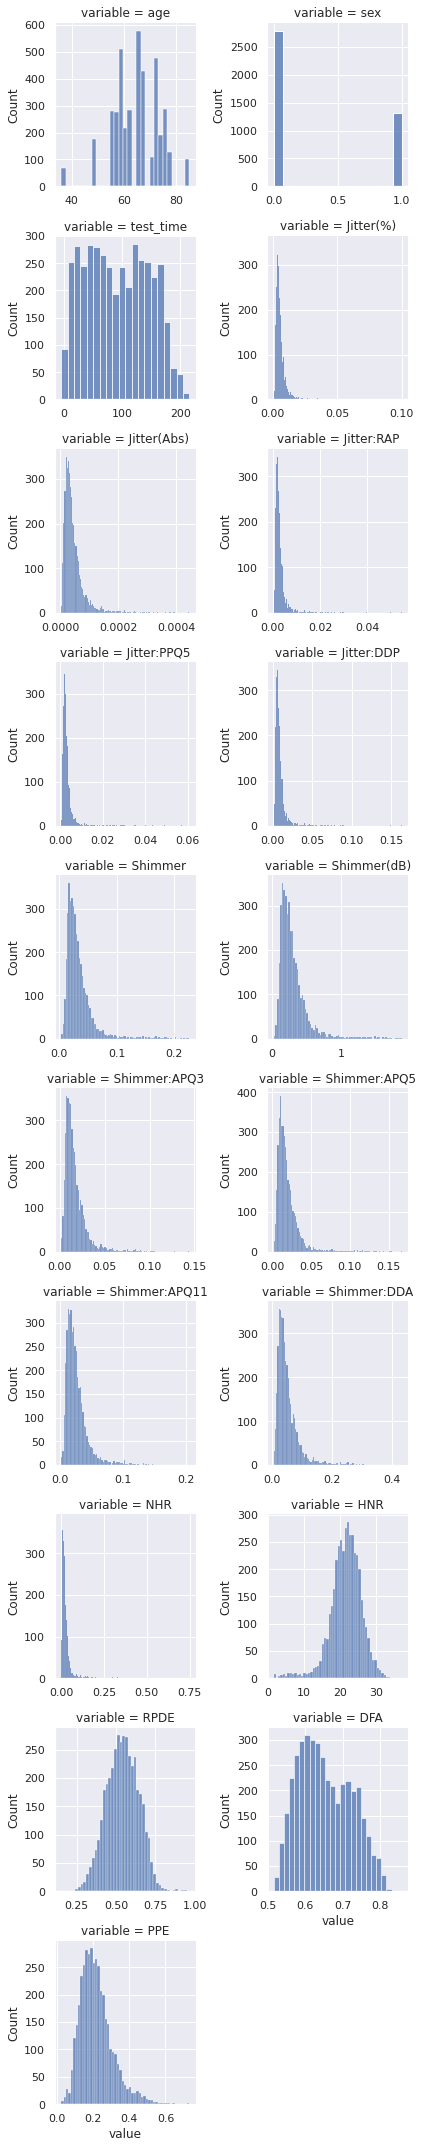

In [171]:
data_t = X_train
data_t = pd.melt(data_t, value_vars=data_t.columns.to_list()) #pd.melt generate a column labeled 'variable'
g = sns.FacetGrid(data_t, col='variable', col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.histplot, 'value')



 Also I use box plot, normalizing first the data set 

age outliers(%) : 0.00
sex outliers(%) : 0.00
test_time outliers(%) : 0.00
Jitter(%) outliers(%) : 6.24
Jitter(Abs) outliers(%) : 5.71
Jitter:RAP outliers(%) : 6.56
Jitter:PPQ5 outliers(%) : 6.51
Jitter:DDP outliers(%) : 6.56
Shimmer outliers(%) : 5.49
Shimmer(dB) outliers(%) : 5.32
Shimmer:APQ3 outliers(%) : 5.37
Shimmer:APQ5 outliers(%) : 5.22
Shimmer:APQ11 outliers(%) : 5.10
Shimmer:DDA outliers(%) : 5.37
NHR outliers(%) : 7.51
HNR outliers(%) : 2.56
RPDE outliers(%) : 0.34
DFA outliers(%) : 0.00
PPE outliers(%) : 3.00


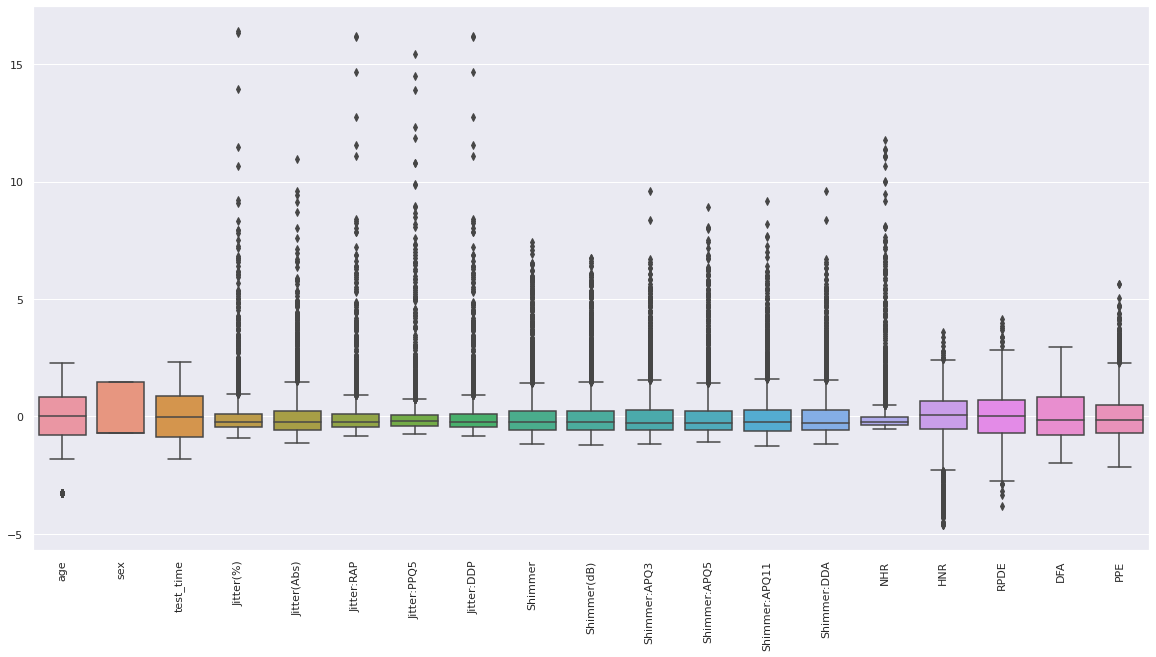

In [172]:
from sklearn.preprocessing import StandardScaler
train = X_train.copy()
tr_x = StandardScaler()
train = tr_x.fit_transform(X_train)
sns.set(rc={"figure.figsize":(20, 10)})
ax = sns.boxplot(data=train )
ax.set_xticklabels(X_train.columns.to_list(), rotation='vertical')

#Outliers percentage
b = X_train.copy()
for col in b.columns.to_list():
    q1 = b[col].quantile(q=0.25)
    q3 = b[col].quantile(q=0.75)
    iqr = q3 - q1
    cont = 0
    maxi = q3 + 1.6*iqr
    mini = q1 - 1.6*iqr
    long = len(b[(b[col]>maxi) | (b[col]<mini)][col])
    long = 100*long/4100
    print('{0} outliers(%) : {1:.2f}'.format(col,long))


I apply log tranform for each data, of the typ log(ax + b) where the most relevant parameter is a. According to the distribution x values y choose this parameter:

In [173]:
a = X_train.copy()
col_1 = ['Jitter(%)','Jitter:RAP','Jitter:PPQ5','NHR','Jitter:DDP','Shimmer:APQ3','Shimmer:APQ5']
a.loc[:,col_1] = np.log(80000*a)

col_2 = ['Shimmer','Shimmer:APQ11','Shimmer:DDA','NHR']
a.loc[:,col_2] = np.log(5000*a)

col_3 = ['Jitter(Abs)']
a.loc[:,col_3] = np.log(8000000*a)

col_4 = ['Shimmer(dB)']
a.loc[:,col_4] = np.log(80*a)

b = X_test.copy()
col_1 = ['Jitter(%)','Jitter:RAP','Jitter:PPQ5','NHR','Jitter:DDP','Shimmer:APQ3','Shimmer:APQ5']
b.loc[:,col_1] = np.log(80000*b)

col_2 = ['Shimmer','Shimmer:APQ11','Shimmer:DDA','NHR']
b.loc[:,col_2] = np.log(5000*b)

col_3 = ['Jitter(Abs)']
b.loc[:,col_3] = np.log(8000000*b)

col_4 = ['Shimmer(dB)']
b.loc[:,col_4] = np.log(80*b)

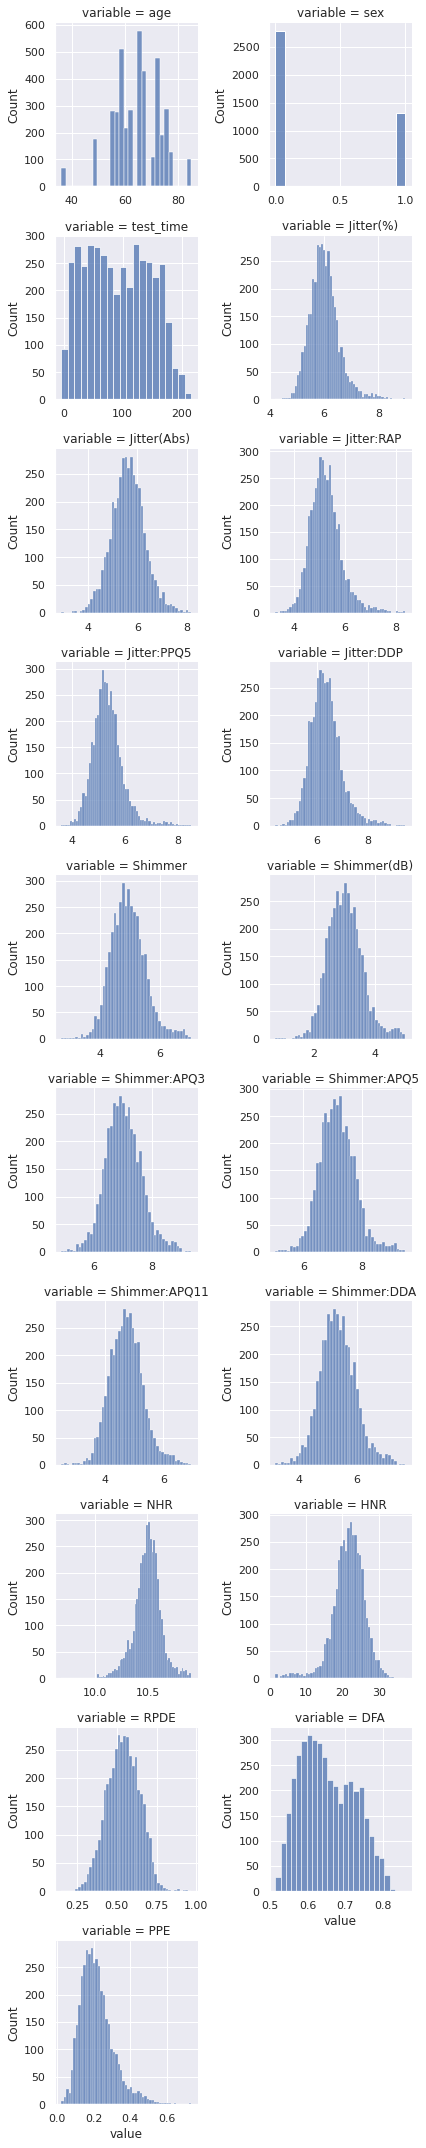

In [174]:
data_t = a
data_t = pd.melt(data_t, value_vars=data_t.columns.to_list()) #pd.melt generate a column labeled 'variable'
g = sns.FacetGrid(data_t, col='variable', col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.histplot, 'value')



age outliers(%) : 0.00
sex outliers(%) : 0.00
test_time outliers(%) : 0.00
Jitter(%) outliers(%) : 2.63
Jitter(Abs) outliers(%) : 1.07
Jitter:RAP outliers(%) : 2.34
Jitter:PPQ5 outliers(%) : 2.95
Jitter:DDP outliers(%) : 2.29
Shimmer outliers(%) : 2.10
Shimmer(dB) outliers(%) : 2.10
Shimmer:APQ3 outliers(%) : 1.49
Shimmer:APQ5 outliers(%) : 1.85
Shimmer:APQ11 outliers(%) : 1.59
Shimmer:DDA outliers(%) : 1.49
NHR outliers(%) : 3.85
HNR outliers(%) : 2.56
RPDE outliers(%) : 0.34
DFA outliers(%) : 0.00
PPE outliers(%) : 3.00


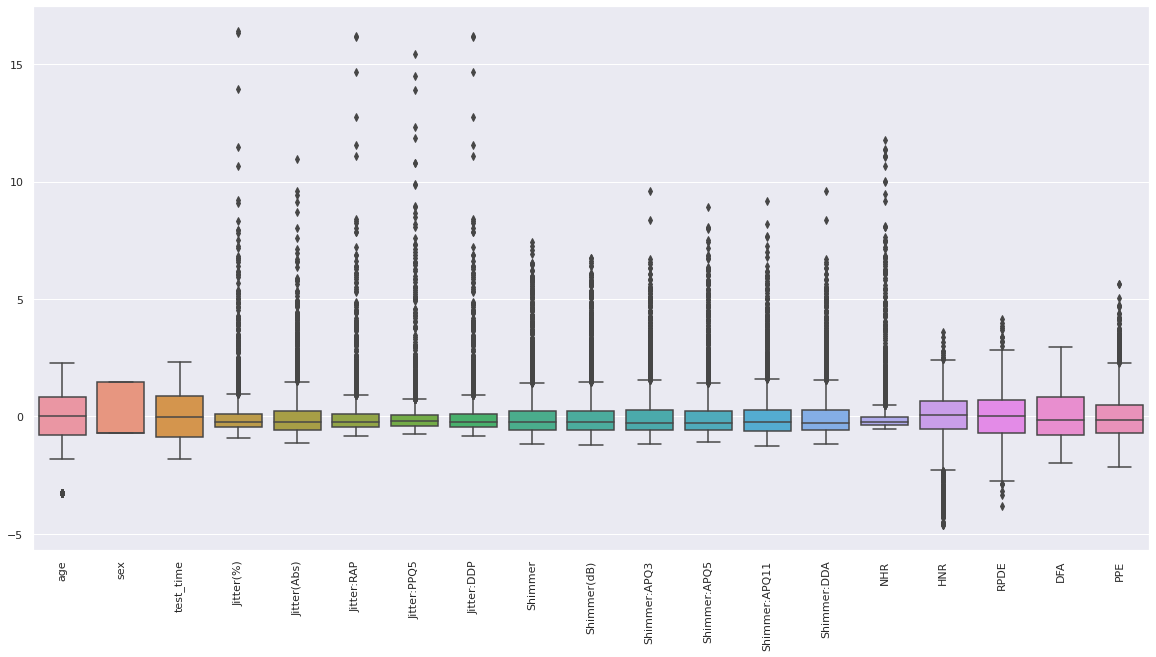

In [175]:
from sklearn.preprocessing import StandardScaler
train = X_train.copy()
tr_x = StandardScaler()
train = tr_x.fit_transform(train)
sns.set(rc={"figure.figsize":(20, 10)})
ax = sns.boxplot(data=train )
ax.set_xticklabels(X_train.columns.to_list(), rotation='vertical')

#Outliers percentage
for col in a.columns.to_list():
    q1 = a[col].quantile(q=0.25)
    q3 = a[col].quantile(q=0.75)
    iqr = q3 - q1
    cont = 0
    maxi = q3 + 1.6*iqr
    mini = q1 - 1.6*iqr
    long = len(a[(a[col]>maxi) | (a[col]<mini)][col])
    long = 100*long/4100
    print('{0} outliers(%) : {1:.2f}'.format(col,long))

With log transformation the ourliers percentage is around the 3%, whereas without the transformation is 5%. It's no a relevant improvement

In [176]:
X_train_log = a #For security, i use a copy of train. When iḿ sure that the transformation that i do are right, i convert  this to the train data
X_test_log = b

Now, I analyse the variation of y (motor and total UPDRS) vs all features, excluding categorical data

/home/ezequiel/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


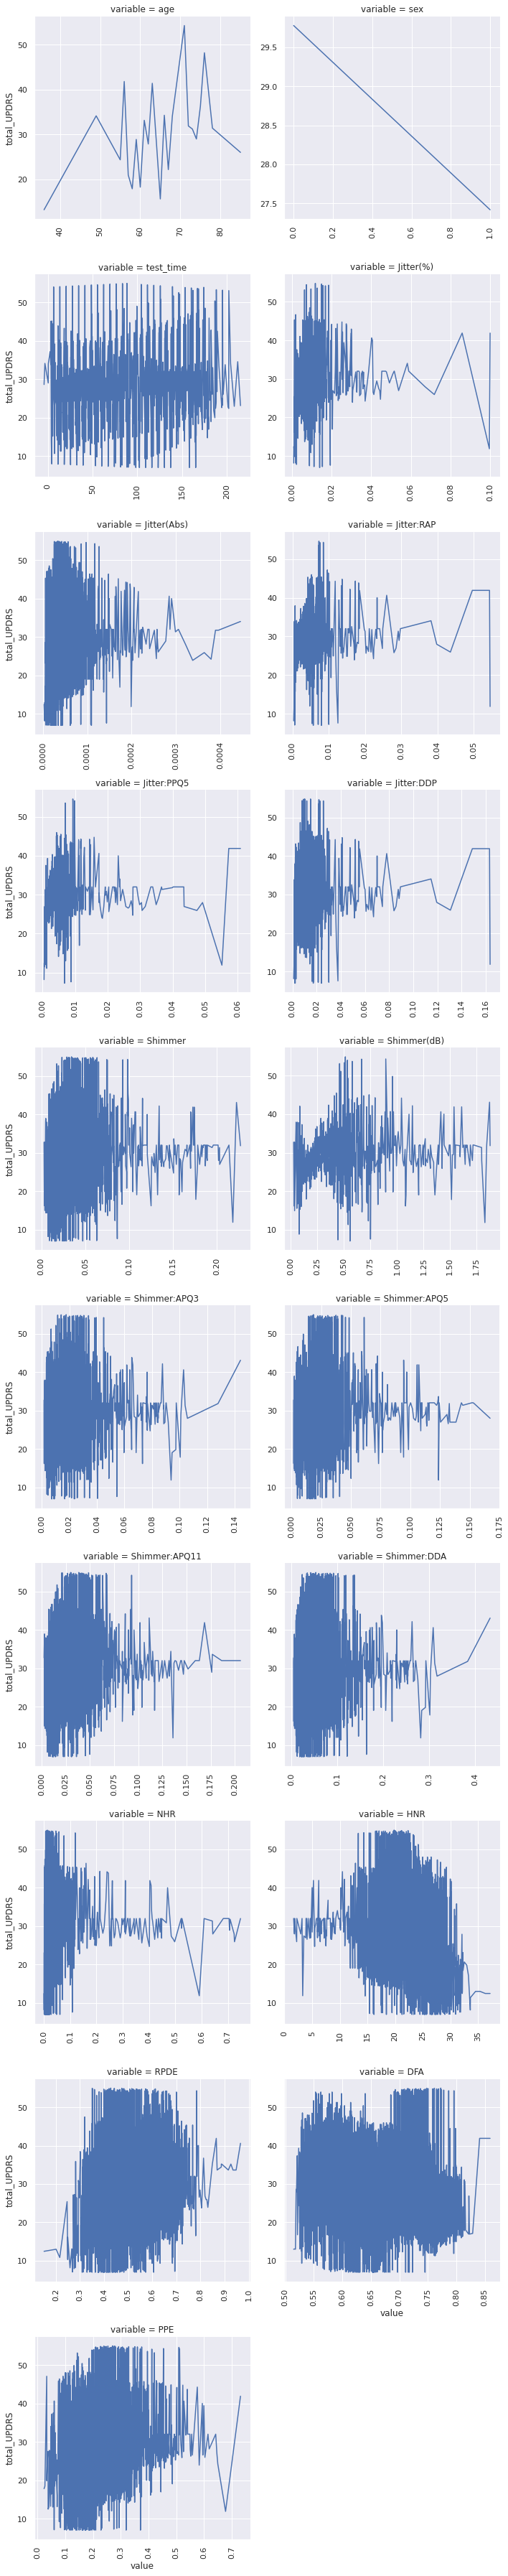

In [177]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)

data_t = pd.concat([X_train, y_train], axis=1)
f = pd.melt(data_t, id_vars=['total_UPDRS'], value_vars=data_t.columns.to_list())
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, 'value','total_UPDRS')

Although there is no linear regression between variables, i try with the lasso regression

Train R2 Score:  0.17


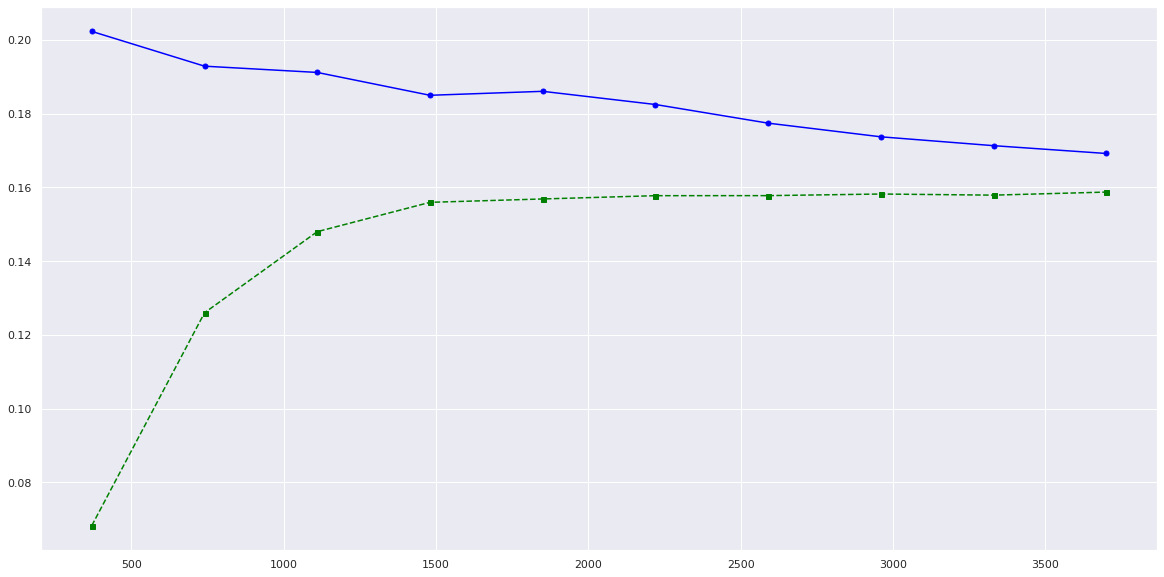

In [178]:
Xtrain = X_train.copy()
Xtest = X_test.copy()
ytrain = y_train.copy()
ytest = y_test.copy()

Xtrain.drop(['test_time'], axis=1, inplace=True)
Xtest.drop(['test_time'], axis=1, inplace=True)

from sklearn.preprocessing import StandardScaler
tr_x = StandardScaler()
Xtrain = tr_x.fit_transform(Xtrain)
Xtest = tr_x.transform(Xtest)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(Xtrain, ytrain.ravel())
ytrain_pred = reg.predict(Xtrain)
ytest_pred = reg.predict(Xtest)

from sklearn.metrics import r2_score
print("Train R2 Score:  {0:.2f}".format(r2_score(ytrain, ytrain_pred)))



from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=reg, X=Xtrain, y=ytrain, train_sizes=np.linspace(0.1, 1.0, 10),
cv=10,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5, label='Training accuracy')

plt.plot(train_sizes, test_mean, color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')

In [179]:
I use log transform train data:
    

SyntaxError: invalid syntax (<ipython-input-179-620ff71777a2>, line 1)

In [ ]:
Xtrain = X_train_log.copy()
Xtest = X_test_log.copy()
ytrain = y_train.copy()
ytest = y_test.copy()

Xtrain.drop(['test_time'], axis=1, inplace=True)
Xtest.drop(['test_time'], axis=1, inplace=True)

from sklearn.preprocessing import StandardScaler
tr_x = StandardScaler()
Xtrain = tr_x.fit_transform(Xtrain)
Xtest = tr_x.transform(Xtest)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(Xtrain, ytrain.ravel())
ytrain_pred = reg.predict(Xtrain)
ytest_pred = reg.predict(Xtest)

from sklearn.metrics import r2_score
print("Train R2 Score:  {0:.2f}".format(r2_score(ytrain, ytrain_pred)))



from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=reg, X=Xtrain, y=ytrain, train_sizes=np.linspace(0.1, 1.0, 10),
cv=10,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5, label='Training accuracy')

plt.plot(train_sizes, test_mean, color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')

The improvement is null, likely because there is the outliers weight in data are low.

It is a poor score for the linear model, perhaps because there is not a linear relation between total UPDRS and the others variables. I add quadratic features because the graphics show high bias in the model

In [ ]:
Xtrain = X_train.copy()
Xtest = X_test.copy()
ytrain = y_train.copy()
ytest = y_test.copy()

Xtrain.drop(['test_time'], axis=1, inplace=True)
Xtest.drop(['test_time'], axis=1, inplace=True)

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
tr_x = StandardScaler()
Xtrain = tr_x.fit_transform(Xtrain)
Xtest = tr_x.transform(Xtest)

quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(Xtrain)
X_quadt = quadratic.transform(Xtest)
Xtrain = X_quad
Xtest = X_quadt


from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(Xtrain, ytrain.ravel())
ytrain_pred = reg.predict(Xtrain)
ytest_pred = reg.predict(Xtest)

from sklearn.metrics import r2_score
print("Train R2 Score:  {0:.2f}".format(r2_score(ytrain, ytrain_pred)))



from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=reg, X=Xtrain, y=ytrain, train_sizes=np.linspace(0.1, 1.0, 10),
cv=10,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.ylim(-1,1)
plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5, label='Training accuracy')

plt.plot(train_sizes, test_mean, color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')

The model'score has improved, but perhaps it is beause the overfitting. Anyway the score is still bad
So i change the model to random forest regression.

In [ ]:
Xtrain = X_train.copy()
Xtest = X_test.copy()
ytrain = y_train.copy()
ytest = y_test.copy()

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(Xtrain, ytrain)
ytrain_pred = forest.predict(Xtrain)
ytest_pred = forest.predict(Xtest)

from sklearn.metrics import r2_score, mean_absolute_error
print("Train R2 Score:  {0:.2f}".format(r2_score(ytrain, ytrain_pred)))
print("Test R2 Score:  {0:.2f}".format(r2_score(ytest, ytest_pred)))
print('-------------------------------------------------------')
print("Train MAE:  {0:.2f}".format(mean_absolute_error(ytrain, ytrain_pred)))
print("Test MAE:  {0:.2f}".format(mean_absolute_error(ytest, ytest_pred)))



It's a good score! I suppouse the random forest work well because the relation between target and variables are non-linear. It's worth to note that overfitting in random forest is reduced when i add age feature to the train data (I try without this feature, obtaining a high overfitting result)

In [ ]:

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=forest, X=Xtrain, y=ytrain, train_sizes=np.linspace(0.1, 1.0, 10),
cv=5,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.ylim(-1,1)
plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5, label='Training accuracy')

plt.plot(train_sizes, test_mean, color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')